## Viterbi Algorithm

From Wikipedia

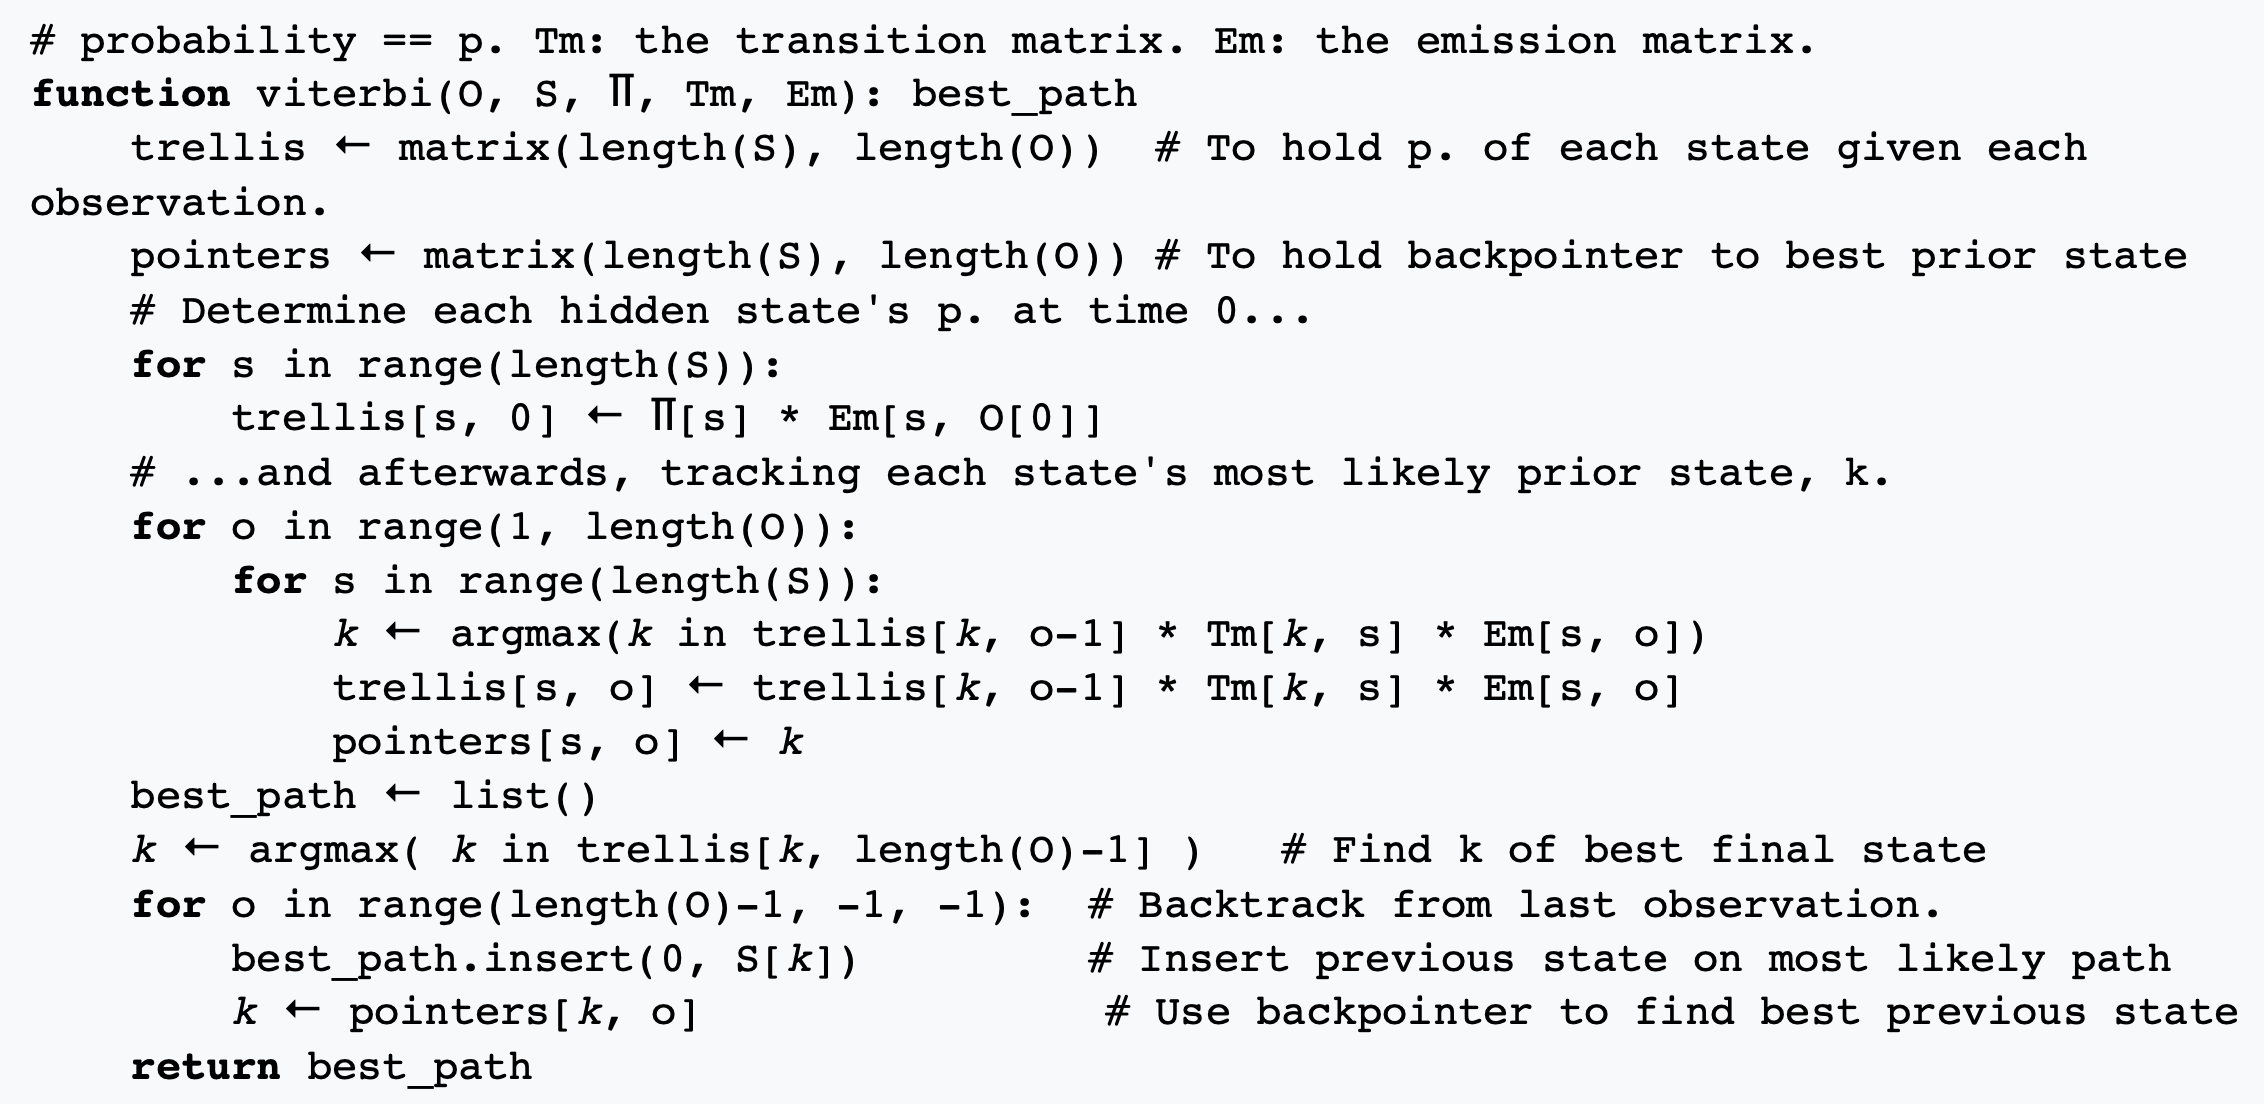

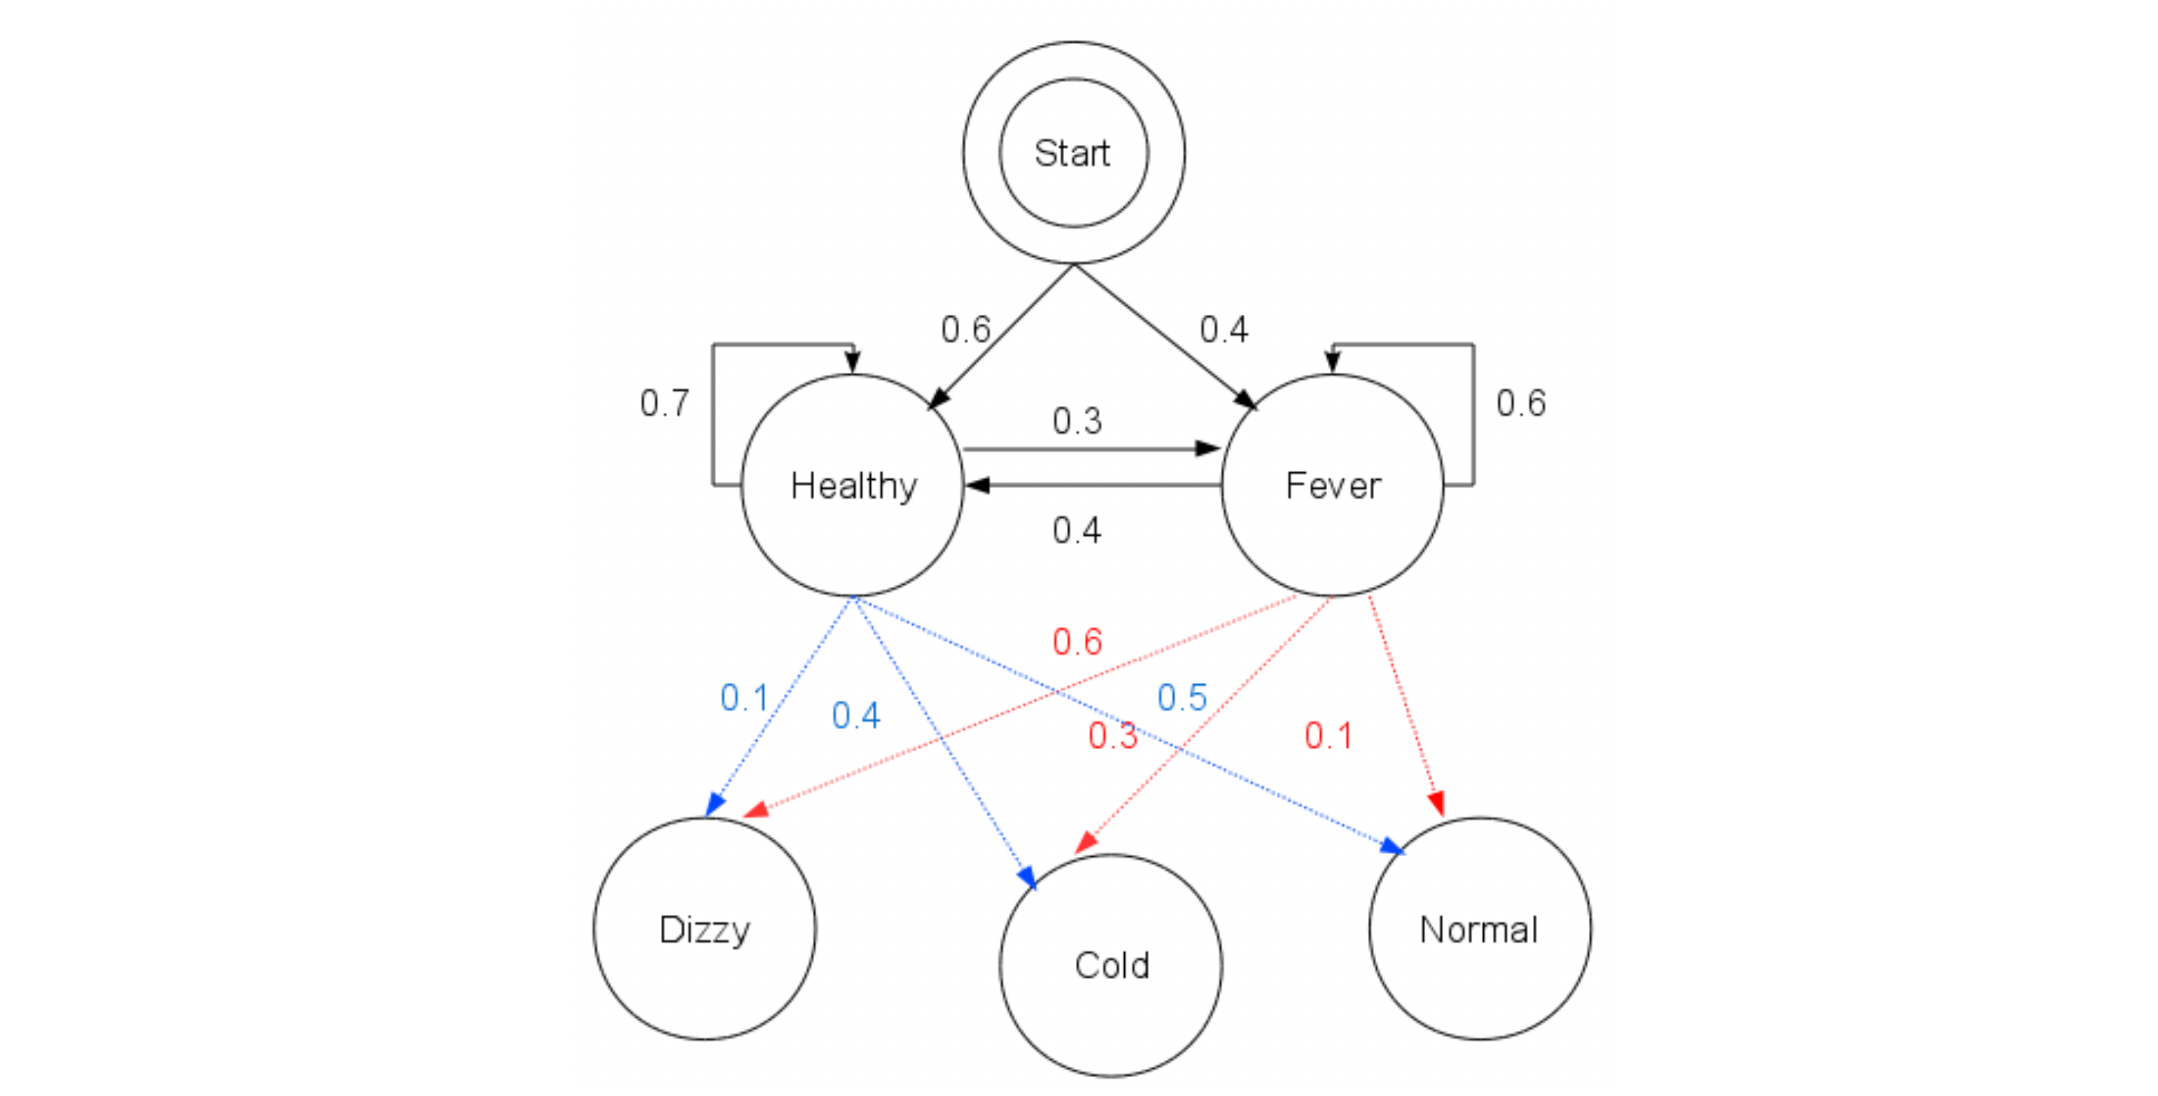

Use the wikipedia code to implement this algorithm.

In [1]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob * emit_p[st] [obs[t]]
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 5 + "     ".join(("%3d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state] ["prob"]) for v in V)

In [2]:
# Specify obs, states, start_p, trans_p, emit_p


In [1]:
# Call the viterbi function and interpret the output
